<a href="https://colab.research.google.com/github/Rohithv07/6WeekPro/blob/master/Cat_Vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !unzip "drive/My Drive/CatVsDog/catvsdog.zip" -d "drive/My Drive/CatVsDog"

# Cat Vs Dog Classification

This project will lead to a model which classifies between cats and dogs using Tensorflow.

## 1. Problem

Our problem is to find out whether the image provided is an image of a dog or a cat.

## 2. Data

As data is the essential part of every machine learning model, here we take the data from Kaggle .
https://www.kaggle.com/tongpython/cat-and-dog

## 3. Evaluation

No specific evaluation criteria, we just need to predict the images to the maximum accuracy.

## 4. Features

Some of the features of the given dataset are:

1. Here we use deep learning or transfer learning as we are dealing with the unstructured data ie. images.
2. This is a binary classification problem as there are only 2 classes, either one is a cat or dog, and no special cases.
3. There are 2 separate directories for test set and training set namely cats and dogs, each with 4000 images of both cat and dog in training set and 1000 images of cats and dogs in testing set.

## Week 1
So here mainly Iam looking forward to complete this classification work in about 6 weeks and the tasks that I planned 
for the first week is as follows:
  1. Getting the images and exploring through those images.
  2. Creating a validation set of our own if it doesn't exist.
  3. Preprocessing the images that is turning the images into Tensors.
  4. Turning our data into batches.
  

### Get our workspace ready

Import the necessary packages like tensorflow, tensorflow hub etc which will be very much handy and the basic needed requirement.

In [ ]:
# Import necessary tools

import tensorflow as tf
import tensorflow_hub as hub

# Check for the availability of GPU, if not make sure GPU is available
print("GPU:", "Yes  GPU Available" if tf.config.list_physical_devices("GPU") else "NO better turn on the GPU")

# Check the version of tensorflow, it must be 2.x
print(tf.__version__)

GPU: Yes  GPU Available
2.2.0


GPU will be very much handy here as it gives great advantage for faster computing of data. 

### Getting our data ready

The dataset that we are using here is readily available and can be easily downloaded from kaggle.com .
After downloading the data set we can just upload it to our Google drive so that since we are using 
Google Colab for this project, it will be easy if we just mount the Google Drive and the data that is
uploaded to the Googe Drive can be easily accessed from the Colab.

https://www.kaggle.com/tongpython/cat-and-dog



In [ ]:
# Making use of more tools by importing them

import cv2 # for resizing images
import numpy as np
import os
from random import shuffle
from tqdm import tqdm # this is to get the progress bar for a particular process

cat_training_directory = "drive/My Drive/CatVsDog/training_set/training_set/cats"
dog_training_directory = "drive/My Drive/CatVsDog/training_set/training_set/dogs"



In [ ]:
len(cat_training_directory), len(dog_training_directory)

(54, 54)

In [ ]:
# Lets have a look at what are the items inside the cat_training_directory and dog_training_directory

cat_images_training = os.listdir(cat_training_directory)
dog_images_training = os.listdir(dog_training_directory)

In [ ]:
cat_images_training, dog_images_training

(['cat.3512.jpg',
  'cat.537.jpg',
  'cat.3481.jpg',
  'cat.569.jpg',
  'cat.629.jpg',
  'cat.3559.jpg',
  'cat.527.jpg',
  'cat.3850.jpg',
  'cat.3617.jpg',
  'cat.3466.jpg',
  'cat.3388.jpg',
  'cat.415.jpg',
  'cat.518.jpg',
  'cat.3967.jpg',
  'cat.59.jpg',
  'cat.567.jpg',
  'cat.3331.jpg',
  'cat.3845.jpg',
  'cat.3229.jpg',
  'cat.417.jpg',
  'cat.517.jpg',
  'cat.578.jpg',
  'cat.3574.jpg',
  'cat.345.jpg',
  'cat.3948.jpg',
  'cat.3489.jpg',
  'cat.386.jpg',
  'cat.3946.jpg',
  'cat.497.jpg',
  'cat.411.jpg',
  'cat.3829.jpg',
  'cat.332.jpg',
  'cat.612.jpg',
  'cat.3903.jpg',
  'cat.3666.jpg',
  'cat.405.jpg',
  'cat.3438.jpg',
  'cat.48.jpg',
  'cat.408.jpg',
  'cat.3212.jpg',
  'cat.3770.jpg',
  'cat.3731.jpg',
  'cat.3684.jpg',
  'cat.3423.jpg',
  'cat.545.jpg',
  'cat.599.jpg',
  'cat.46.jpg',
  'cat.3206.jpg',
  'cat.3941.jpg',
  'cat.3654.jpg',
  'cat.3196.jpg',
  'cat.3460.jpg',
  'cat.713.jpg',
  'cat.710.jpg',
  'cat.654.jpg',
  'cat.886.jpg',
  'cat.988.jpg',
  'ca

In [ ]:
# Lets look at the length
len(cat_images_training), len(dog_images_training)

(4000, 4005)

So we now see that we are having 4000 images in the training set of cats and 4005 images in the training set of dogs.

Lets view 1 image from each set next.

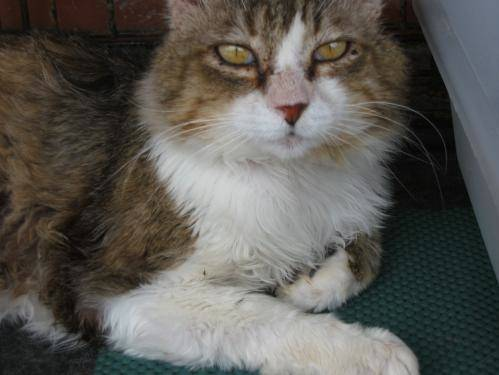

In [ ]:
# Lets look into an image from the dataset
from IPython.display import Image
Image(cat_training_directory + "/cat.3496.jpg")

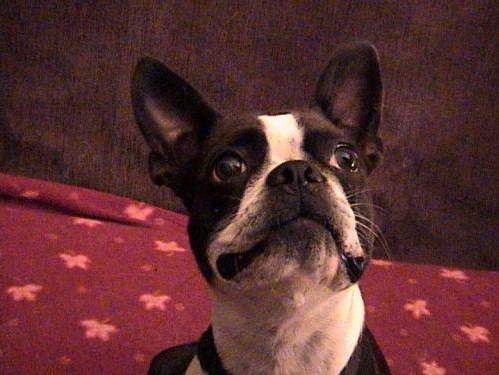

In [ ]:
Image(dog_training_directory + "/dog.393.jpg")

### Getting images and their labels.

Lets try to get images and their labels by first trying to get the filepathnames for cat and dog.

In [ ]:
def label_img(img):
    word_label = img.split('.')[-3]
    # conversion to one-hot array [cat,dog]
    #                            [much cat, no dog]
    if word_label == 'cat': return [1,0]
    #                             [no cat, very doggo]
    elif word_label == 'dog': return [0,1]

In [ ]:
cat_label = []
for image in tqdm(cat_images_training):
  label = label_img(image)
  cat_label.append(np.array(label))



dog_label = []
for image in tqdm(dog_images_training):
  label = label_img(image)
  dog_label.append(np.array(label))

cat_label[:10], dog_label[:10]

100%|██████████| 4005/4005 [00:00<00:00, 343514.19it/s]


([array([1, 0]),
  array([1, 0]),
  array([1, 0]),
  array([1, 0]),
  array([1, 0]),
  array([1, 0]),
  array([1, 0]),
  array([1, 0]),
  array([1, 0]),
  array([1, 0])],
 [array([0, 1]),
  array([0, 1]),
  array([0, 1]),
  array([0, 1]),
  array([0, 1]),
  array([0, 1]),
  array([0, 1]),
  array([0, 1]),
  array([0, 1]),
  array([0, 1])])

In [ ]:
len(cat_label), len(dog_label)

(4000, 4005)

In [ ]:
# Create a filepath for our cats
file_path_cat = ["drive/My Drive/CatVsDog/training_set/training_set/cats/" +fname  for fname in cat_images_training]
file_path_cat[:10]

['drive/My Drive/CatVsDog/training_set/training_set/cats/cat.3512.jpg',
 'drive/My Drive/CatVsDog/training_set/training_set/cats/cat.537.jpg',
 'drive/My Drive/CatVsDog/training_set/training_set/cats/cat.3481.jpg',
 'drive/My Drive/CatVsDog/training_set/training_set/cats/cat.569.jpg',
 'drive/My Drive/CatVsDog/training_set/training_set/cats/cat.629.jpg',
 'drive/My Drive/CatVsDog/training_set/training_set/cats/cat.3559.jpg',
 'drive/My Drive/CatVsDog/training_set/training_set/cats/cat.527.jpg',
 'drive/My Drive/CatVsDog/training_set/training_set/cats/cat.3850.jpg',
 'drive/My Drive/CatVsDog/training_set/training_set/cats/cat.3617.jpg',
 'drive/My Drive/CatVsDog/training_set/training_set/cats/cat.3466.jpg']

In [ ]:
# Same way try to create the filepath for our dogs
file_path_dog = ["drive/My Drive/CatVsDog/training_set/training_set/dogs/" + fname for fname in dog_images_training]
file_path_dog[:2]

['drive/My Drive/CatVsDog/training_set/training_set/dogs/dog.3684.jpg',
 'drive/My Drive/CatVsDog/training_set/training_set/dogs/dog.396.jpg']

In [ ]:
# For our own purpose lets check whether the number of filepath of both cat and dogs is equal to the number of files in the cat and dog training directory
import os
# Check for cat
if len(cat_images_training) == len(file_path_cat):
  print("Hell yeah , you can proceed to victory")
else:
  print("Come on, we can check it again, its natural to check everything again")

Hell yeah , you can proceed to victory


In [ ]:
# Check the same for our dogs
if len(dog_images_training) == len(file_path_dog):
  print("Hell yeah , you can proceed to victory")
else:
  print("Come on, we can check it again, its natural to check everything again")

Hell yeah , you can proceed to victory


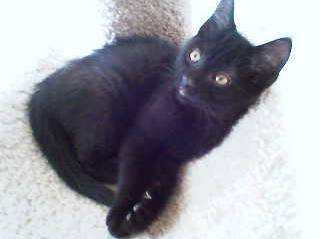

In [ ]:
Image(file_path_cat[100])

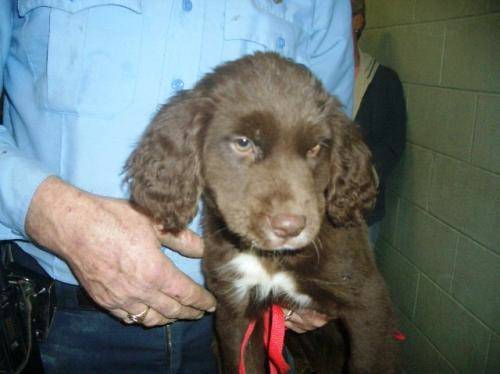

In [ ]:
Image(file_path_dog[100])

So after these steps, we got our training images as a list, so we can just take the next step to deal with the label

In [ ]:
# Cat
import numpy as np
cat_label = np.array(cat_label)
cat_label

# Dog 
dog_label = np.array(dog_label)
dog_label

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

In [ ]:
cat_label

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

### Lets create our own validation set

Since there is not prebuilt validation set, Lets try to create a one for ourselves.

1. Here we start with the cat section.
2. Then we proceed with the dog section.

In [ ]:
# Cat 
X_cat = file_path_cat
y_cat = cat_label

# Dog
X_dog = file_path_dog
y_dog = dog_label

Since we have about 4000 images for cat section, lets test whether we are in the right track with some 1000 images and then continue with the full dataset

In [ ]:
# Set the number of images for experimentation with some 1000 images
NUM_IMAGES = 1000 #@param { type:"slider", min:1000, max:4000, step:1000}

In [ ]:
# Lets make use of our friendly Scikit-Learn now
from sklearn.model_selection import train_test_split

# Split the cat into training and testing using the NUM_IMAGES
X_cat_train, X_cat_val, y_cat_train, y_cat_val = train_test_split(X_cat[:NUM_IMAGES],
                                                                  y_cat[:NUM_IMAGES],
                                                                  test_size=0.2,
                                                                  random_state=42)
# Split the dog into training and testign using the NUM_IMAGES
X_dog_train, X_dog_val, y_dog_train, y_dog_val = train_test_split(X_dog[:NUM_IMAGES],
                                                                  y_dog[:NUM_IMAGES],
                                                                  test_size=0.2,
                                                                  random_state=42)



In [ ]:
len(X_cat_train), len(y_cat_val), len(X_dog_train), len(y_dog_val)

(800, 200, 800, 200)

In [ ]:
X_cat_train[:5], y_cat_train[:5]

(['drive/My Drive/CatVsDog/training_set/training_set/cats/cat.411.jpg',
  'drive/My Drive/CatVsDog/training_set/training_set/cats/cat.342.jpg',
  'drive/My Drive/CatVsDog/training_set/training_set/cats/cat.3727.jpg',
  'drive/My Drive/CatVsDog/training_set/training_set/cats/cat.3979.jpg',
  'drive/My Drive/CatVsDog/training_set/training_set/cats/cat.512.jpg'],
 array([[1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0]]))

### Preprocessing Image

We take all of our images and  turn them into numbers which is required for every probelm dealing with images.

So here we convert each of the images into numbers and we just use these numbers in the later cases.

We can create a function to do the following things:
1. Take an image filepath as input.
2. Use tensorflow to read an image and save it into `image`
3. Turn our images into tensors.
4. Resize the image(`224, 224` might be the better one).
5. Return the modified image.


In [ ]:
# Lets convert our image into numpy array
from matplotlib.pyplot import imread
image_cat = imread(file_path_cat[50]) # Read an image
image_cat.shape

(375, 499, 3)

In [ ]:
image_cat, image_cat.min(), image_cat.max()

(array([[[146, 159, 150],
         [142, 155, 146],
         [139, 152, 143],
         ...,
         [ 67,  72,  42],
         [ 71,  76,  46],
         [ 75,  80,  50]],
 
        [[151, 164, 157],
         [147, 160, 153],
         [144, 157, 150],
         ...,
         [ 66,  71,  41],
         [ 70,  75,  45],
         [ 75,  80,  50]],
 
        [[156, 169, 162],
         [154, 167, 160],
         [152, 165, 158],
         ...,
         [ 66,  71,  41],
         [ 70,  75,  45],
         [ 74,  79,  49]],
 
        ...,
 
        [[199, 178, 131],
         [198, 177, 132],
         [196, 178, 132],
         ...,
         [105, 115, 107],
         [105, 115, 107],
         [105, 115, 107]],
 
        [[197, 176, 129],
         [199, 178, 133],
         [199, 181, 135],
         ...,
         [104, 114, 106],
         [104, 114, 106],
         [104, 114, 106]],
 
        [[195, 174, 127],
         [200, 179, 134],
         [202, 184, 138],
         ...,
         [103, 113, 105],
  

In [ ]:
tf.constant(image_cat)[:2]

<tf.Tensor: shape=(2, 499, 3), dtype=uint8, numpy=
array([[[146, 159, 150],
        [142, 155, 146],
        [139, 152, 143],
        ...,
        [ 67,  72,  42],
        [ 71,  76,  46],
        [ 75,  80,  50]],

       [[151, 164, 157],
        [147, 160, 153],
        [144, 157, 150],
        ...,
        [ 66,  71,  41],
        [ 70,  75,  45],
        [ 75,  80,  50]]], dtype=uint8)>

So lets carry on with our functions to :
1.  Take an image filepath as input.
2. Use tensorflow to read the file and save it to a variable, `image`
3. Turn our image into Tensors.
4. Resize the images as discussed about into `224, 224`.
5. Return the modified image

If in doubt for loading the images, please refer:
https://www.tensorflow.org/tutorials/load_data/images

In [ ]:

# First we define the image size
IMG_SIZE = 224

# Lets carry on with the function we are talking about
def preprocess_image(image_path, img_size=IMG_SIZE):
  """
  Takes the image path and turns the images into required tensors
  1. Read an image file.
  2. Turn the jpeg image into numerical tensors with 3 color channels.
  3. Covert the colour channel values from 0 to 255 to 0 to 1 values.
  4. Resize the image into `224, 224`.
  """

  image = tf.io.read_file(image_path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

Oh yeah, Iam thinking that we are in the right track and we just created a useful function to preprocess our image that is turning each and every images of our dogs and cats into tensors.Now we need to created data batches.

### Turning our data into batches

Idea behind turning the data is, if we need to process a large dataset, they all might not fit into memory in one go.
So thats why we do about 32 images at a time.

1. Lets make a tuple in the form of image, label for cats.
2. Then make the same for the dogs section.

Lets try this thing out.

Now lets try to turn our data into batches.

Here we will be creating a tuple `image, label` for the effective use of tensorflow.

In [ ]:
# Funtion to create the tuple we are talking about
def get_our_image_label(image_path, label):
  """
  Here we will take the image_path, label, preprocess it and returns tuple `image, label`
  """
  image = preprocess_image(image_path)
  return image, label

In [ ]:
get_our_image_label(file_path_cat[25], tf.constant(y_cat[25]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.45661768, 0.4409314 , 0.4056373 ],
         [0.46029648, 0.4446102 , 0.4093161 ],
         [0.4652749 , 0.44877455, 0.41375178],
         ...,
         [0.09803922, 0.09411766, 0.07450981],
         [0.09803922, 0.09411766, 0.07450981],
         [0.09803922, 0.09411766, 0.07450981]],
 
        [[0.46611524, 0.45042896, 0.41513485],
         [0.46668243, 0.45099616, 0.41570204],
         [0.47062618, 0.45412582, 0.41910306],
         ...,
         [0.10128678, 0.09736521, 0.07775736],
         [0.10128678, 0.09736521, 0.07775736],
         [0.10128678, 0.09736521, 0.07775736]],
 
        [[0.46946782, 0.45378155, 0.41848743],
         [0.46779877, 0.4521125 , 0.41681838],
         [0.4643908 , 0.44789046, 0.4128677 ],
         ...,
         [0.10588236, 0.10196079, 0.08235294],
         [0.10588236, 0.10196079, 0.08235294],
         [0.10588236, 0.10196079, 0.08235294]],
 
        ...,
 
        [[0.64705884, 0.60784316

Now lets turn our data into batches, the last task of this week. Lets do this with a function which will be more suitable as we have seen a function to turn our data into batches before.

Reference: https://www.tensorflow.org/api_docs/python/tf/data/Dataset

Why we shuffle our data: https://datascience.stackexchange.com/questions/24511/why-should-the-data-be-shuffled-for-machine-learning-tasks

In [ ]:
# First of all start with defining a size
BATCH_SIZE = 32

# Our function to turn the data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  This function just created data batches for image, label pairs.
  We do the shuffling if it is the training data, not for validation data.
  We also accpect the test data which do not have any label
  """
  # 1. Test data
  if test_data:
    print("creating test data batches.....")
    data = tf.data.Dataset.from_tensor_slices(tf.constant(x)) # Only for filepath as there is no labels
    data_batch = data.map(preprocess_image).batch(BATCH_SIZE)
    return data_batch
  
  # 2. Validation data
  elif valid_data:
    print("creating validation data batches....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y))) # here both for filepath and label as its validation data
    data_batch = data.map(get_our_image_label).batch(BATCH_SIZE)
    return data_batch

  # 3. Training data
  else:
    print("creating training data batches....")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y))) # here both filepath and label as its training data
    # Here we shuffles our data and we do it before mapping inorder to have a faster performance
    data = data.shuffle(buffer_size=len(x))
    data = data.map(get_our_image_label)
    data_batch = data.batch(BATCH_SIZE)
    return data_batch

Yeah, we created the function to turn our data into data batches, it will be very much handy throughout this project.
Lets have a test on this by creating training and validation data batches for both cat and dog.

In [ ]:
# Create training and validation data bacthes for cats
train_cat_data = create_data_batches(X_cat_train, y_cat_train)
val_cat_data = create_data_batches(X_cat_val, y_cat_val, valid_data=True)

creating training data batches....
creating validation data batches....


In [ ]:
# Create training and validation data batches for dogs
train_dog_data = create_data_batches(X_dog_train, y_dog_train)
val_dog_data = create_data_batches(X_dog_val, y_dog_val, valid_data=True)

creating training data batches....
creating validation data batches....


`element_spec` : The type specification of an element of this dataset.

In [ ]:
# Checking the different attributes of our cat data_batches
train_cat_data.element_spec, val_cat_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 2), dtype=tf.int64, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 2), dtype=tf.int64, name=None)))

In [ ]:
# Checking the different attributes of our dog data_batches
train_dog_data.element_spec, val_dog_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 2), dtype=tf.int64, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 2), dtype=tf.int64, name=None)))

### Visualizing data batches

We wrote a handy function, we turned our data into batches, but after running the function which just see some texts and numbers which is very much hard for everyone to grasp what actually is going on. So if we are stuck with those kinds of blocks always try to visualize and it will be a good thing and can be easily understood by anyone.

So lets create another function to have this work done

In [ ]:
# Lets do this for our cat
import matplotlib.pyplot as plt

def show_images_cat(images):
  """
  We just plot say 25 images along with their labels
  """
  plt.figure(figsize=(10, 10))
  # We planned for 25 images, lets loop through 25 images
  for i in range(25):
    # Create subplots with 5 rows, 5 columns each
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title("cat")
    plt.axis("off")

In [ ]:
train_cat_images, train_cat_labels = next(train_cat_data.as_numpy_iterator())
train_cat_images[:4], train_cat_labels[:4]

(array([[[[5.00690460e-01, 5.79121828e-01, 6.11404717e-01],
          [5.34612477e-01, 6.09122276e-01, 6.74598455e-01],
          [5.10797441e-01, 5.77779233e-01, 6.54319823e-01],
          ...,
          [6.46060824e-01, 7.20885754e-01, 7.74212241e-01],
          [6.35609150e-01, 7.06197381e-01, 7.61099398e-01],
          [6.02775872e-01, 6.73364103e-01, 7.28266060e-01]],
 
         [[5.08070767e-01, 5.86502135e-01, 6.18785024e-01],
          [5.12099564e-01, 5.86609364e-01, 6.52085543e-01],
          [4.82979953e-01, 5.49961746e-01, 6.26502335e-01],
          ...,
          [6.52373254e-01, 7.27198124e-01, 7.80524611e-01],
          [6.52888536e-01, 7.23476768e-01, 7.78378785e-01],
          [6.15336001e-01, 6.85924232e-01, 7.40826190e-01]],
 
         [[5.29005885e-01, 6.07437253e-01, 6.39720142e-01],
          [5.10309458e-01, 5.84819257e-01, 6.50295496e-01],
          [4.78973031e-01, 5.45954823e-01, 6.22495413e-01],
          ...,
          [6.64706945e-01, 7.36486733e-01, 7.9003

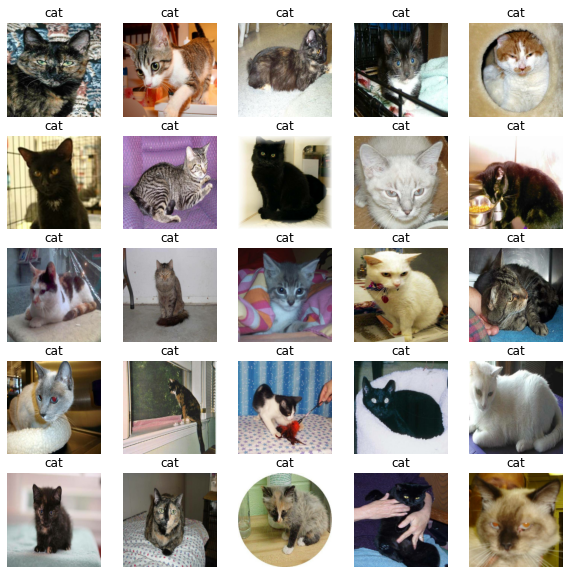

In [ ]:
train_cat_images, train_cat_labels = next(train_cat_data.as_numpy_iterator())
show_images_cat(train_cat_images)

In [ ]:
# Lets create the same for dogs by using a similar functions
